Source of this notebook: [Udemy: Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp) by Jose Portilla

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'seaborn'

## Data

We need to get data using pandas [datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html). We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

## Read the data from remote server

In [2]:
start = datetime.datetime(2013,12,31)
end = datetime.datetime(2019,1,1)

In [7]:
# get stock infromation from remote server
BAC = data.DataReader('BAC', 'iex', start, end) # Bank of America
C = data.DataReader('C','iex',start,end) #CitiGroup
GS = data.DataReader('GS','iex',start,end) # Goldman Sachs
JPM = data.DataReader('JPM','iex',start,end) # JPMorgan Chase
MS = data.DataReader('MS','iex',start,end) # Morgan Stanley
WFC = data.DataReader('WFC','iex',start,end) # Wells Fargo

In [6]:
# Create a list of the ticker symbols (as strings) in alphabetical order.
tickers = ['BAC','C','GS','JPM','MS','WFC']

## Consolidate data into one dataframe

In [8]:
# concatenate the individual bank dataframes into one dataframe, using the tickers as a column index
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)
bank_stocks.head()

BAC                                              C           \
               open     high      low    close     volume     open     high   
date                                                                          
2014-01-06  15.5191  15.6171  15.4584  15.5517  114727379  51.0411  51.6789   
2014-01-07  15.6544  15.6731  15.3557  15.4024  112141137  51.9645  52.0882   
2014-01-08  15.5611  15.5797  15.4202  15.4771  101227932  51.6789  52.3547   
2014-01-09  15.5611  15.8004  15.5097  15.7104  101275343  52.3547  52.6213   
2014-01-10  15.6358  15.6731  15.5051  15.6544   87682477  52.3833  52.4372   

                                          ...          MS                    \
                low    close    volume    ...        open     high      low   
date                                      ...                                 
2014-01-06  50.8603  51.2220  28524005    ...     28.9665  29.1308  28.7202   
2014-01-07  51.1934  51.5742  28855151    ...     29.0122  29.0943  28.6563   
2014-01-08  51.5932  52.1739  26002326    ...     28.7932  29.0441  28.6199   
2014-01-09  52.1263  52.5451  21812007    ...     28.8844  28.9574  28.6107   
2014-01-10  51.6884  52.0882  22496888    ...     28.8114  28.8571  28.3735   

                                   WFC                                       
              close    volume     open     high      low    close    volume  
date                                                                         
2014-01-06  28.8479   9031669  39.4827  39.7255  39.3352  39.3873  18521241  
2014-01-07  28.7567   9246079  39.7168  39.7168  39.2138  39.3699  16963813  
2014-01-08  28.7932   8930184  39.3699  39.8469  39.3266  39.8209  20907314  
2014-01-09  28.7841   7322294  39.8642  40.0637  39.7168  40.0290  14389488  
2014-01-10  28.5560  10571296  39.9423  39.9423  39.5694  39.8382  15532776  

[5 rows x 30 columns]

In [9]:
# set the names of the column level names for indices
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [10]:
# look at the first few rows of the consolidated dataframe
bank_stocks.head()

Bank Ticker      BAC                                              C           \
Stock Info      open     high      low    close     volume     open     high   
date                                                                           
2014-01-06   15.5191  15.6171  15.4584  15.5517  114727379  51.0411  51.6789   
2014-01-07   15.6544  15.6731  15.3557  15.4024  112141137  51.9645  52.0882   
2014-01-08   15.5611  15.5797  15.4202  15.4771  101227932  51.6789  52.3547   
2014-01-09   15.5611  15.8004  15.5097  15.7104  101275343  52.3547  52.6213   
2014-01-10   15.6358  15.6731  15.5051  15.6544   87682477  52.3833  52.4372   

Bank Ticker                                ...          MS                    \
Stock Info       low    close    volume    ...        open     high      low   
date                                       ...                                 
2014-01-06   50.8603  51.2220  28524005    ...     28.9665  29.1308  28.7202   
2014-01-07   51.1934  51.5742  28855151    ...     29.0122  29.0943  28.6563   
2014-01-08   51.5932  52.1739  26002326    ...     28.7932  29.0441  28.6199   
2014-01-09   52.1263  52.5451  21812007    ...     28.8844  28.9574  28.6107   
2014-01-10   51.6884  52.0882  22496888    ...     28.8114  28.8571  28.3735   

Bank Ticker                         WFC                                       
Stock Info     close    volume     open     high      low    close    volume  
date                                                                          
2014-01-06   28.8479   9031669  39.4827  39.7255  39.3352  39.3873  18521241  
2014-01-07   28.7567   9246079  39.7168  39.7168  39.2138  39.3699  16963813  
2014-01-08   28.7932   8930184  39.3699  39.8469  39.3266  39.8209  20907314  
2014-01-09   28.7841   7322294  39.8642  40.0637  39.7168  40.0290  14389488  
2014-01-10   28.5560  10571296  39.9423  39.9423  39.5694  39.8382  15532776  

[5 rows x 30 columns]

## Explore the data

Following steps make use of [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html).
The pandas dataframe [.xs()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html), and the pandas dataframe [.xs()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) function is also used - this function can be used to get a cross-section of the data in a dataframe.

### Find the max close price for each bank

In [14]:
# Method 1
for tick in tickers:
    print(tick,bank_stocks[tick]['close'].max())

BAC 32.3681
C 78.3443
GS 270.4223
JPM 116.856
MS 57.8855
WFC 64.0585


In [16]:
# Method 2
bank_stocks.xs(key='close',axis=1,level='Stock Info').head(2)

Bank Ticker      BAC        C        GS      JPM       MS      WFC
date                                                              
2014-01-06   15.5517  51.2220  167.6132  51.8528  28.8479  39.3873
2014-01-07   15.4024  51.5742  166.6040  51.2552  28.7567  39.3699

In [15]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     32.3681
C       78.3443
GS     270.4223
JPM    116.8560
MS      57.8855
WFC     64.0585
dtype: float64

### Calculate percent returns for each bank
Returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [18]:
# create a new pandas dataframe to hold the returns data
returns = pd.DataFrame()

We can use pandas [pct_change()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.pct_change.html) method on the Close column to create a column representing this return value.

In [20]:
for tick in tickers:
    returns[f'{tick} Returns'] = bank_stocks[tick]['close'].pct_change()
returns.head()

BAC Returns  C Returns  GS Returns  JPM Returns  MS Returns  \
date                                                                      
2014-01-06          NaN        NaN         NaN          NaN         NaN   
2014-01-07    -0.009600   0.006876   -0.006021    -0.011525   -0.003161   
2014-01-08     0.004850   0.011628    0.000842     0.009431    0.001269   
2014-01-09     0.015074   0.007115   -0.005828    -0.001869   -0.000316   
2014-01-10    -0.003565  -0.008695    0.005581    -0.004595   -0.007925   

            WFC Returns  
date                     
2014-01-06          NaN  
2014-01-07    -0.000442  
2014-01-08     0.011455  
2014-01-09     0.005226  
2014-01-10    -0.004767

### Create a [seaborn](https://seaborn.pydata.org/) [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) using the returns dataframe.

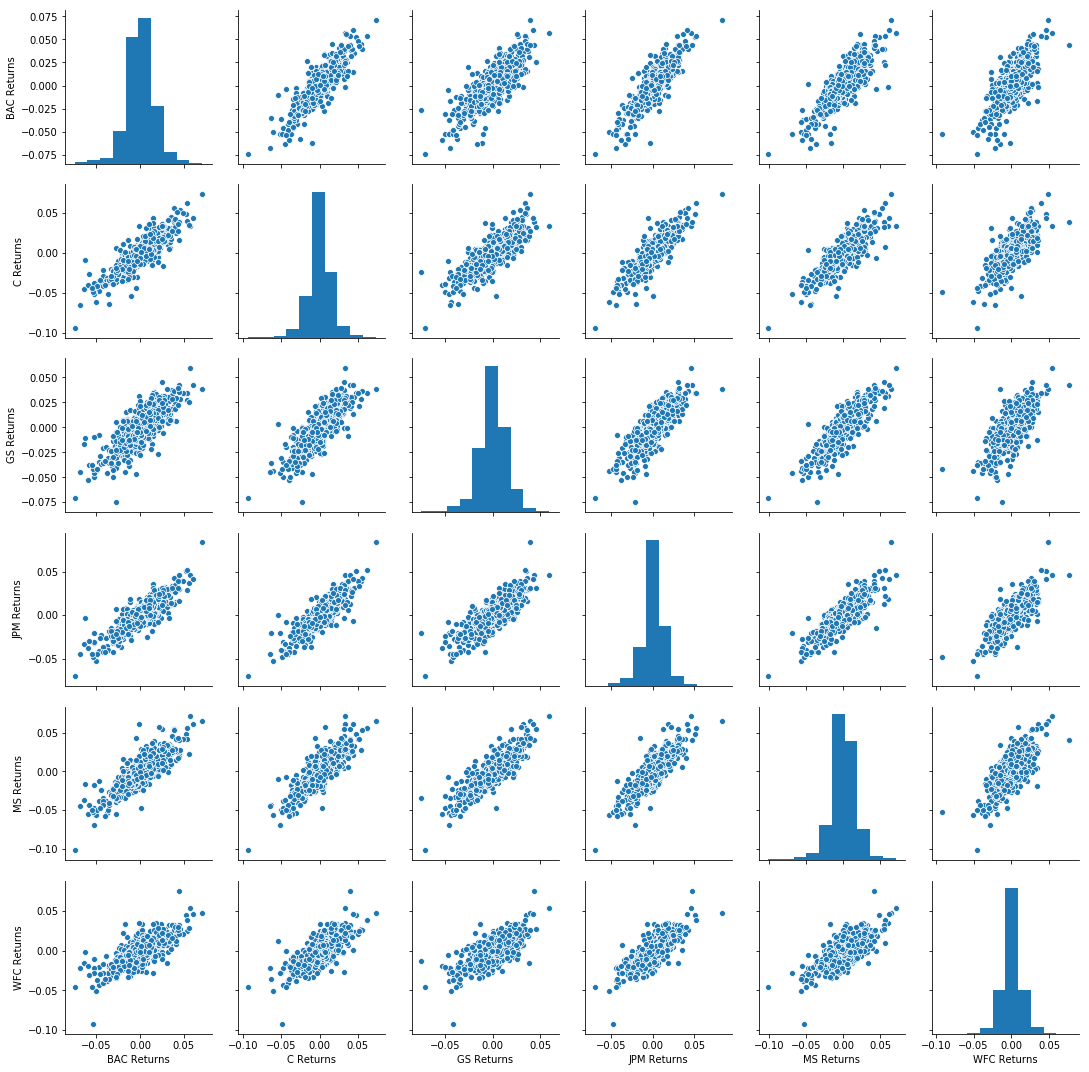

In [21]:
# note that the .dropna() function removes the initial row of 'NaN' data
sns.pairplot(returns.dropna(how='all'))

### Determine the dates each bank stock had the best and worst single day returns

In [34]:
df_returns = pd.DataFrame()

In [35]:
# date of worst return
df_returns['Worst Day'] = returns.idxmin()  # returns index of the min

In [36]:
# value of worst return
df_returns['Worst Day Value'] = returns.min()  # min value in each column

In [37]:
df_returns['Best Day'] = returns.idxmax()

In [38]:
df_returns['Best Day Value'] = returns.max()

In [39]:
df_returns

Worst Day  Worst Day Value    Best Day  Best Day Value
BAC Returns  2016-06-24        -0.074077  2016-02-12        0.070781
C Returns    2016-06-24        -0.093567  2016-02-12        0.073185
GS Returns   2018-11-12        -0.074557  2016-11-09        0.058872
JPM Returns  2016-06-24        -0.069476  2016-02-12        0.083286
MS Returns   2016-06-24        -0.101502  2016-11-09        0.070969
WFC Returns  2018-02-05        -0.092243  2016-11-10        0.075848

### Examine standard deviation of the returns

In [40]:
# standard deviation over all rows
returns.std()

BAC Returns    0.016022
C Returns      0.015177
GS Returns     0.014318
JPM Returns    0.013138
MS Returns     0.016386
WFC Returns    0.012717
dtype: float64

In [42]:
# standard deviation over 2015
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Returns    0.016174
C Returns      0.015288
GS Returns     0.014043
JPM Returns    0.014006
MS Returns     0.016287
WFC Returns    0.012552
dtype: float64

### Create a distplot using seaborn of the 2015 returns for Morgan Stanley

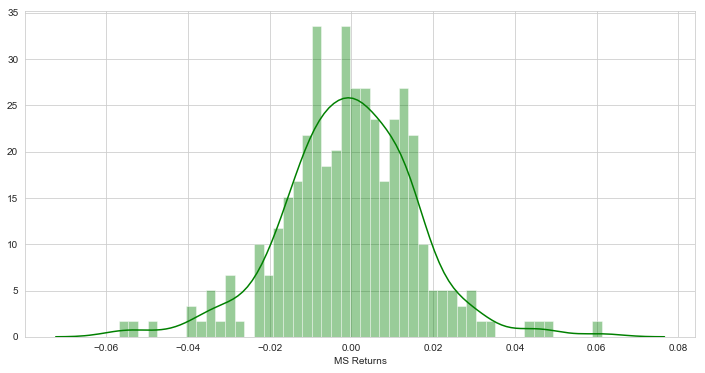

In [49]:
from matplotlib import pyplot
fig, ax = pyplot.subplots(figsize=(12,6))
sns.set_style("whitegrid")
sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Returns'],color='green',bins=50,ax=ax)

Note: the line in the plot above is a "kde" ([kernal density estimation](https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation) plot

____
## More Visualization

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

### Create a line plot showing Close price for each bank for the entire index of time

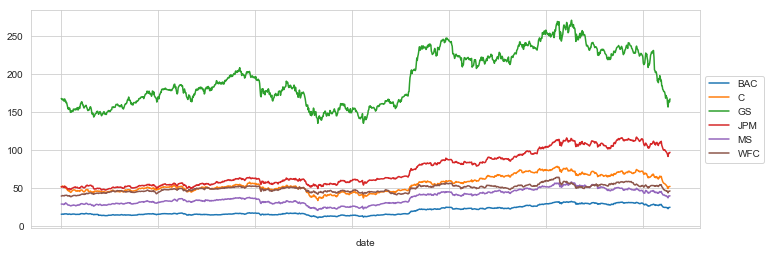

In [54]:
# use dataframe plotting method
for tick in tickers:
    bank_stocks[tick]['close'].plot(label=tick,figsize=(12,4))
plt.legend(loc='center left',bbox_to_anchor=(1,.5))

### Create an interactive plot using plotly

In [58]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').iplot()

### Moving Averages

Let's analyze the moving averages for these stocks in the year 2015. 

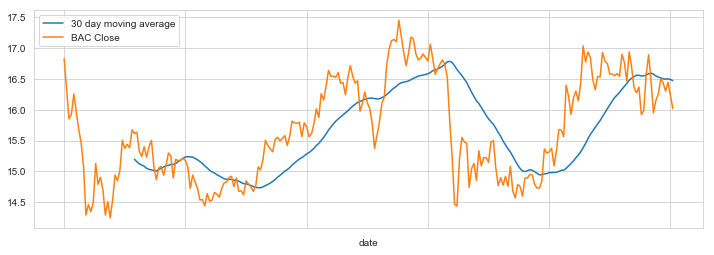

In [59]:
plt.figure(figsize=(12,4))
BAC['close'].loc['2015-01-01':'2016-01-01'].rolling(window=30).mean().plot(label='30 day moving average')
BAC['close'].loc['2015-01-01':'2016-01-01'].plot(label='BAC Close')
plt.legend()

### Create a heatmap of the correlation between the stocks Close Price
Uses the pandas dataframe [.corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) method to calculate pairwise correlation of the columns

In [60]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').corr()

Bank Ticker       BAC         C        GS       JPM        MS       WFC
Bank Ticker                                                            
BAC          1.000000  0.953508  0.903940  0.979478  0.963000  0.814566
C            0.953508  1.000000  0.933873  0.917077  0.971756  0.848235
GS           0.903940  0.933873  1.000000  0.869279  0.962547  0.891929
JPM          0.979478  0.917077  0.869279  1.000000  0.928849  0.802914
MS           0.963000  0.971756  0.962547  0.928849  1.000000  0.858334
WFC          0.814566  0.848235  0.891929  0.802914  0.858334  1.000000

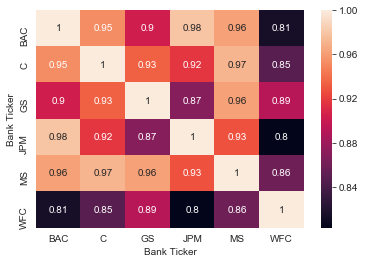

In [61]:
sns.heatmap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

### Create a clustermap of the correlation between the stocks Close Price

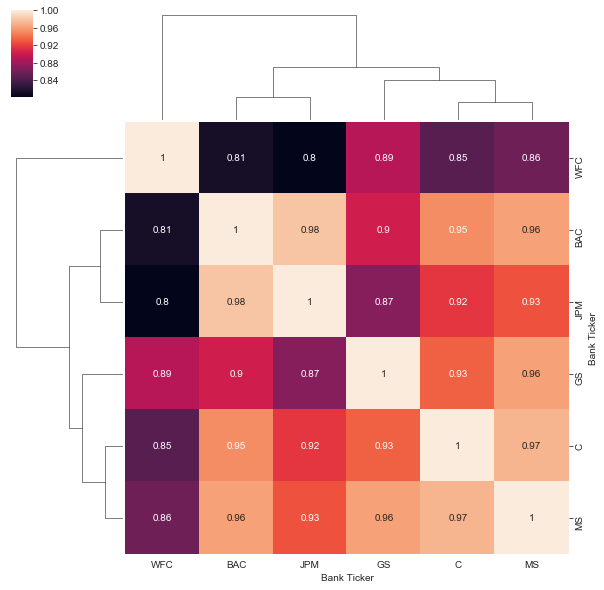

In [63]:
sns.clustermap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

# Create Technical Analysis Plots

In [72]:
close_corr = bank_stocks.xs(key='close',axis=1,level='Stock Info').corr()

In [73]:
close_corr

Bank Ticker       BAC         C        GS       JPM        MS       WFC
Bank Ticker                                                            
BAC          1.000000  0.953508  0.903940  0.979478  0.963000  0.814566
C            0.953508  1.000000  0.933873  0.917077  0.971756  0.848235
GS           0.903940  0.933873  1.000000  0.869279  0.962547  0.891929
JPM          0.979478  0.917077  0.869279  1.000000  0.928849  0.802914
MS           0.963000  0.971756  0.962547  0.928849  1.000000  0.858334
WFC          0.814566  0.848235  0.891929  0.802914  0.858334  1.000000

### Create a candle stick plot

In [69]:
bac15 = BAC[['open','high','low','close']].loc['2015-01-01':'2016-01-01'] # need in specific order
bac15.iplot(kind='candle')

### Create a [moving average plot](https://plot.ly/pandas/moving-average/#moving-averages-in-cufflinks)

In [70]:
MS['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])  # plotly technical analysis plots

### Create a [Bollinger Band Plot](https://plot.ly/pandas/bollinger-bands/)

In [71]:
#Bollinger Band Plot
BAC['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')